# One-shot optimization

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [264]:
train_df = pd.read_csv("train.log")
size = len(train_df)
print(f"{size} rows; {size//10:_}/200_000 episodes ({100*(size//10)/200_000:.1f}%)")
train_df.tail()

2000000 rows; 200_000/200_000 episodes (100.0%)


,loss,reward,q_value
1999995,65.623077,-60.912849,-52.812042
1999996,65.599968,-60.912849,-52.813469
1999997,65.576729,-60.912849,-52.814903
1999998,65.553627,-60.912849,-52.816330
1999999,65.530647,-60.912849,-52.817749


In [265]:
ma = train_df.ewm(span=len(train_df)/30).mean()

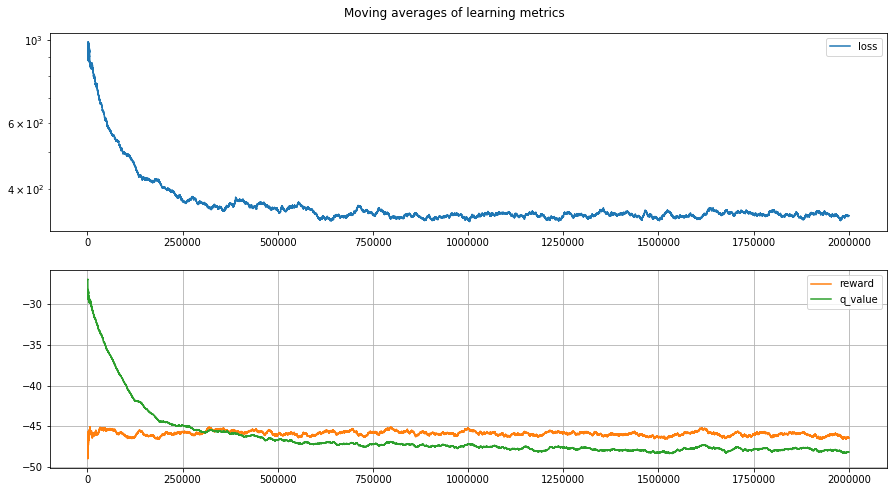

In [266]:
fig, axes = plt.subplots(nrows=2, figsize=(15,8))

axes[0].plot(ma.iloc[1000:]['loss'], label='loss')
axes[0].set_yscale('log')
axes[0].legend(loc="upper right")

axes[1].plot(ma.iloc[1000:]['reward'], label='reward', color="C1")
axes[1].plot(ma.iloc[1000:]['q_value'], label='q_value', color="C2")
axes[1].grid()
axes[1].legend(loc="upper right")

fig.suptitle("Moving averages of learning metrics", x=0.5, y=0.925)
# plt.subplots_adjust(right=2, top=1.5)
plt.show()

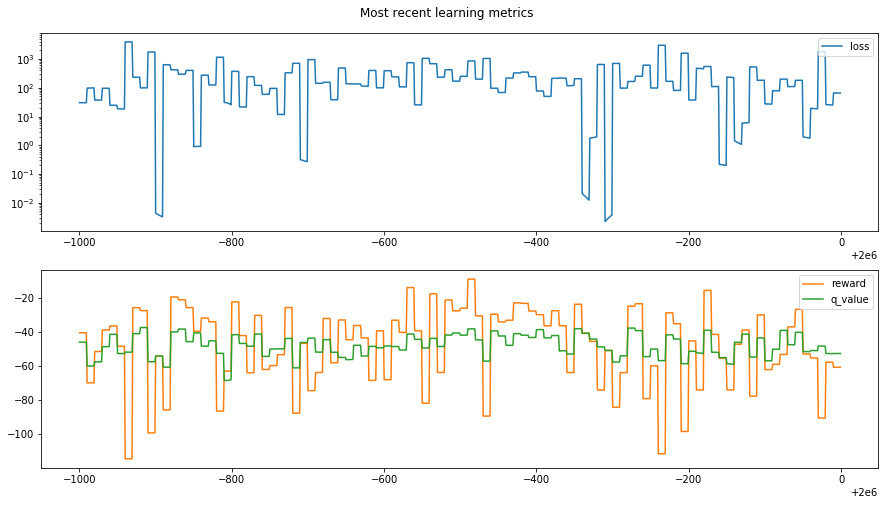

In [267]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 8))
window = 1000
df = train_df.iloc[-window:]

axes[0].plot(df['loss'], label='loss')
axes[0].set_yscale('log')
axes[0].legend(loc="upper right")
axes[1].plot(df['reward'], label='reward', color="C1")
axes[1].plot(df['q_value'], label='q_value', color="C2")
axes[1].legend(loc="upper right")

fig.suptitle("Most recent learning metrics", x=0.5, y=0.925)
plt.show()

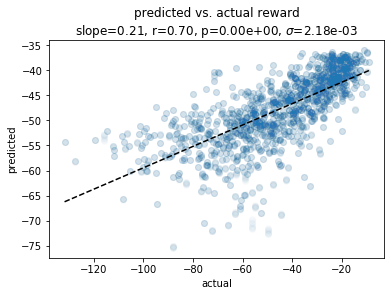

In [268]:
window = 10000
x = train_df.iloc[-window:]['reward'].values
y = train_df.iloc[-window:]['q_value'].values
plt.scatter(x, y, alpha=1/50)
m, b, r, p, s = stats.linregress(x, y)
x = np.linspace(x.min(), x.max(), 3)
y = m*x + b
plt.plot(x, y, linestyle="--", color='black')
plt.title(f"predicted vs. actual reward\nslope={m:.2f}, r={r:.2f}, p={p:.2e}, $\sigma$={s:.2e}")
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()